<a href="https://colab.research.google.com/github/NataSamo/Python-ML/blob/main/sk_learn_%D1%81%D0%B5%D1%82%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X, y = load_digits(return_X_y=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

In [ ]:
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [ ]:
y_pred = mlp.predict(X_test)

In [ ]:
print(f"Точность: {accuracy_score(y_test, y_pred):.4f}")

Точность: 0.9833


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
idx = 0
for i in range(len(y_test)):
  if y_test[i] != y_pred[i]:
    idx = i
    break

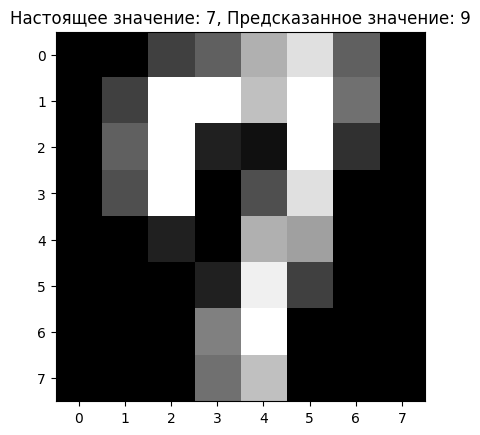

In [ ]:

image = X_test[idx].reshape(8, 8)
plt.imshow(image, cmap='gray')
plt.title(f"Настоящее значение: {y_test[idx]}, Предсказанное значение: {y_pred[idx]}")
plt.show()

MNIST

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
X_mnist, y_mnist = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [ ]:
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

In [ ]:
mlp_mnist = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

In [ ]:
mlp_mnist.fit(X_train_mnist, y_train_mnist)

MLPClassifier(max_iter=1000, random_state=42)

In [ ]:
y_pred_mnist = mlp_mnist.predict(X_test_mnist)

In [ ]:
print(f"Точность: {accuracy_score(y_test_mnist, y_pred_mnist):.4f}")

Точность: 0.9626


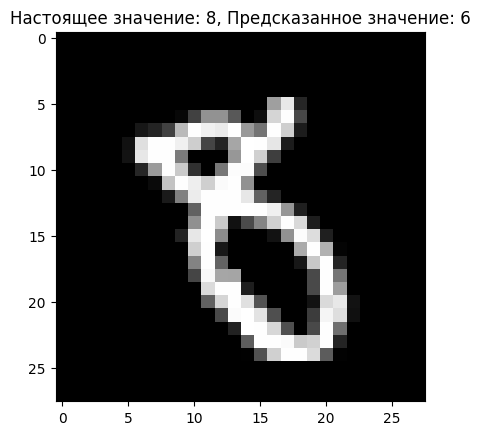

In [ ]:
idx = 0
for i in range(len(y_test_mnist)):
  if y_test_mnist[i] != y_pred_mnist[i]:
    idx = i
    break

image = X_test_mnist[idx].reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.title(f"Настоящее значение: {y_test_mnist[idx]}, Предсказанное значение: {y_pred_mnist[idx]}")
plt.show()

Бинараная классификация %2

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
y_new_mnist = []
for i in y_mnist:
  if int(i) % 2 == 0:
    y_new_mnist.append('0')
  else:
    y_new_mnist.append('1')


In [ ]:
y_new_mnist = np.array(y_new_mnist)

In [ ]:
y_new_mnist

array(['1', '0', '0', ..., '0', '1', '0'], dtype='<U1')

In [ ]:
X_train_mnist_2, X_test_mnist_2, y_train_mnist_2, y_test_mnist_2 = train_test_split(X_mnist, y_new_mnist, test_size=0.2, random_state=42)

In [ ]:
mlp2 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

In [ ]:
mlp2.fit(X_train_mnist_2, y_train_mnist_2)

MLPClassifier(max_iter=1000, random_state=42)

In [ ]:
y_pred_mnist_2 = mlp2.predict(X_test_mnist_2)

In [ ]:
print(f"Точность: {accuracy_score(y_test_mnist_2, y_pred_mnist_2):.4f}")

Точность: 0.9862


Бинарная классификация: 0 и остальные цифры

In [ ]:
y_new_mnist_0 = []
for i in y_mnist:
  if int(i) == 0:
    y_new_mnist_0.append('0')
  else:
    y_new_mnist_0.append('1')
y_new_mnist_0 = np.array(y_new_mnist_0)
y_new_mnist_0

array(['1', '0', '1', ..., '1', '1', '1'], dtype='<U1')

In [ ]:
X_train_mnist_0, X_test_mnist_0, y_train_mnist_0, y_test_mnist_0 = train_test_split(X_mnist, y_new_mnist_0, test_size=0.2, random_state=42)

In [ ]:
mlp0 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

In [ ]:
mlp0.fit(X_train_mnist_0, y_train_mnist_0)

MLPClassifier(max_iter=1000, random_state=42)

In [ ]:
y_pred_mnist_0 = mlp0.predict(X_test_mnist_0)

In [ ]:
print(f"Точность: {accuracy_score(y_test_mnist_0, y_pred_mnist_0):.4f}")

Точность: 0.9957


Нормализация

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scaler = MinMaxScaler()
X_train_scaled_MM = scaler.fit_transform(X_train)
X_test_scaled_MM = scaler.transform(X_test)

In [ ]:
mlpMM = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlpMM.fit(X_train_scaled_MM, y_train)
y_pred_scaled_MM = mlpMM.predict(X_test_scaled_MM)
print(f"Точность: {accuracy_score(y_test, y_pred_scaled_MM):.4f}")

Точность: 0.9806


In [ ]:
scaler = StandardScaler()
X_train_scaled_SS = scaler.fit_transform(X_train)
X_test_scaled_SS = scaler.transform(X_test)

In [ ]:
mlpSS = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlpSS.fit(X_train_scaled_SS, y_train)
y_pred_scaled_SS = mlpSS.predict(X_test_scaled_SS)
print(f"Точность: {accuracy_score(y_test, y_pred_scaled_SS):.4f}")

Точность: 0.9806
